In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [3]:
# Select files concerning "Noise Events"
files = ['csv_results_41_255439_mp-01-naamsestraat-35-maxim.csv',
            'csv_results_41_255440_mp-02-naamsestraat-57-xior.csv',
            'csv_results_41_255441_mp-03-naamsestraat-62-taste.csv',
            'csv_results_41_255442_mp-05-calvariekapel-ku-leuven.csv',
            'csv_results_41_255443_mp-06-parkstraat-2-la-filosovia.csv',
            'csv_results_41_255444_mp-07-naamsestraat-81.csv',
            'csv_results_41_255445_mp-08-kiosk-stadspark.csv',
            'csv_results_41_280324_mp08bis---vrijthof.csv',
            'csv_results_41_303910_mp-04-his-hears.csv']

# Loop through each csv in list files and read them into a consolidated dataframe
noise_event = pd.DataFrame()
for file in files:
    file='../data/raw/export_41/'+file
    df_temp = pd.read_csv(file,sep=';')
    noise_event = pd.concat([noise_event, df_temp], axis=0)

### Preprocess Data

In [4]:
noise_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81056 entries, 0 to 401
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   #object_id                                        81056 non-null  object 
 1   description                                       81056 non-null  object 
 2   result_timestamp                                  81056 non-null  object 
 3   noise_event_laeq_model_id                         77234 non-null  float64
 4   noise_event_laeq_model_id_unit                    0 non-null      float64
 5   noise_event_laeq_primary_detected_certainty       77234 non-null  float64
 6   noise_event_laeq_primary_detected_certainty_unit  81056 non-null  object 
 7   noise_event_laeq_primary_detected_class           77234 non-null  object 
 8   noise_event_laeq_primary_detected_class_unit      0 non-null      object 
dtypes: float64(3), objec

In [5]:
# Drop columns that are all NULL
noise_event = noise_event.dropna(axis=1, how='all')
# Drop rows that contains NULL
noise_event = noise_event.dropna()

In [6]:
# Check for duplicate rows
noise_event.duplicated().sum() # There's no duplicate rows

0

In [7]:
# Keep the part before '.' in 'result_timestamp'
noise_event['result_timestamp'] = noise_event['result_timestamp'].str.split('.').str[0]
# Convert the 'noise_event_laeq_model_id' column to a character (string) data type
noise_event['#object_id'] = noise_event['#object_id'].astype(str)
noise_event['noise_event_laeq_model_id'] = noise_event['noise_event_laeq_model_id'].astype(str)

In [8]:
# Convert the 'result_timestamp' column to a datetime data type
noise_event['result_timestamp'] = pd.to_datetime(noise_event['result_timestamp'], format='%d/%m/%Y %H:%M:%S')

# Round the timestamp to the nearest hour interval
noise_event['hourly_timestamp'] = noise_event['result_timestamp'].dt.floor('H')

# Create new 'day' column
noise_event['day'] = noise_event['result_timestamp'].dt.strftime('%a')

# Create new 'hour' column
noise_event['hour'] = noise_event['result_timestamp'].dt.hour

# Create new 'date' column
noise_event['date'] = noise_event['result_timestamp'].dt.date

# Create new 'month' column
noise_event['month'] = noise_event['hourly_timestamp'].dt.month

In [9]:
# Select and reorganize columns
noise_event = noise_event.loc[:, ['hourly_timestamp', '#object_id', 'description', 'noise_event_laeq_model_id',
                                  'noise_event_laeq_primary_detected_certainty',
                                  'noise_event_laeq_primary_detected_class', 'date', 'month','day','hour']]

In [16]:
# Save to csv file
# noise_event.to_csv('../data/processed/export41_noise_event.csv', index=False)

In [10]:
noise_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77234 entries, 228 to 401
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   hourly_timestamp                             77234 non-null  datetime64[ns]
 1   #object_id                                   77234 non-null  object        
 2   description                                  77234 non-null  object        
 3   noise_event_laeq_model_id                    77234 non-null  object        
 4   noise_event_laeq_primary_detected_certainty  77234 non-null  float64       
 5   noise_event_laeq_primary_detected_class      77234 non-null  object        
 6   date                                         77234 non-null  object        
 7   month                                        77234 non-null  int64         
 8   day                                          77234 non-null  object        


In [11]:
noise_event.head()

,hourly_timestamp,#object_id,description,noise_event_laeq_model_id,noise_event_laeq_primary_detected_certainty,noise_event_laeq_primary_detected_class,date,month,day,hour
228,2022-03-07 16:00:00,255439,MP 01: Naamsestraat 35 Maxim,13.0,86.0,Transport road - Passenger car,2022-03-07,3,Mon,16
229,2022-03-07 19:00:00,255439,MP 01: Naamsestraat 35 Maxim,13.0,83.0,Transport road - Siren,2022-03-07,3,Mon,19
230,2022-03-07 19:00:00,255439,MP 01: Naamsestraat 35 Maxim,13.0,87.0,Transport road - Passenger car,2022-03-07,3,Mon,19
231,2022-03-07 20:00:00,255439,MP 01: Naamsestraat 35 Maxim,13.0,89.0,Human voice - Shouting,2022-03-07,3,Mon,20
232,2022-03-07 22:00:00,255439,MP 01: Naamsestraat 35 Maxim,13.0,99.0,Transport road - Passenger car,2022-03-07,3,Mon,22


In [12]:
noise_event.shape

(77234, 10)

In [13]:
noise_event.describe(include='all', datetime_is_numeric=True)

,hourly_timestamp,#object_id,description,noise_event_laeq_model_id,noise_event_laeq_primary_detected_certainty,noise_event_laeq_primary_detected_class,date,month,day,hour
count,77234,77234,77234,77234,77234.000000,77234,77234,77234.000000,77234,77234.000000
unique,NaN,7,7,6,NaN,7,359,NaN,7,NaN
top,NaN,255439,MP 01: Naamsestraat 35 Maxim,16.0,NaN,Transport road - Passenger car,2022-05-19,NaN,Thu,NaN
freq,NaN,25089,25089,64286,NaN,47388,1053,NaN,14542,NaN
mean,2022-07-19 12:26:50.430639360,NaN,NaN,NaN,67.538506,NaN,NaN,7.083914,NaN,11.675454
min,2022-01-07 16:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,0.000000
25%,2022-05-18 13:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,5.000000,NaN,8.000000
50%,2022-07-12 12:00:00,NaN,NaN,NaN,91.000000,NaN,NaN,7.000000,NaN,11.000000
75%,2022-09-29 14:00:00,NaN,NaN,NaN,99.000000,NaN,NaN,9.000000,NaN,16.000000
max,2022-12-31 23:00:00,NaN,NaN,NaN,100.000000,NaN,NaN,12.000000,NaN,23.000000


### Conduct Exploratory Data Analysis

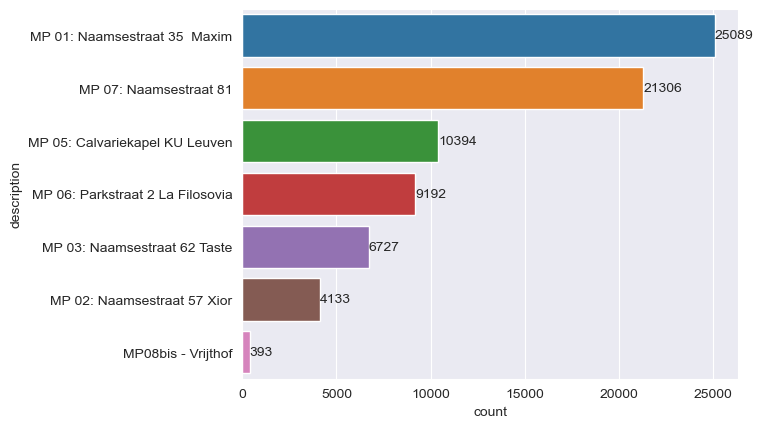

In [17]:
# Visualize column 'description'
sns.countplot(y='description', data=noise_event,
              order = noise_event['description'].value_counts().index)

# Add count values to the plot
counts = noise_event['description'].value_counts()
for i, count in enumerate(counts):
    plt.annotate(count, (count + 1, i), ha='left', va='center')

plt.show()

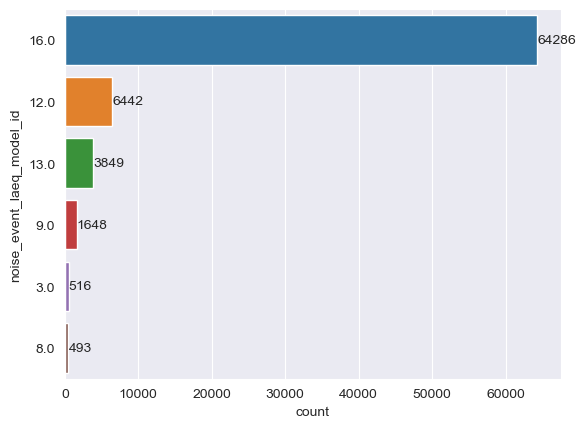

In [18]:
# Visualize column 'noise_event_laeq_model_id'
sns.countplot(y='noise_event_laeq_model_id', data=noise_event,
              order = noise_event['noise_event_laeq_model_id'].value_counts().index)

# Add count values to the plot
counts = noise_event['noise_event_laeq_model_id'].value_counts()
for i, count in enumerate(counts):
    plt.annotate(count, (count + 1, i), ha='left', va='center')

plt.show()

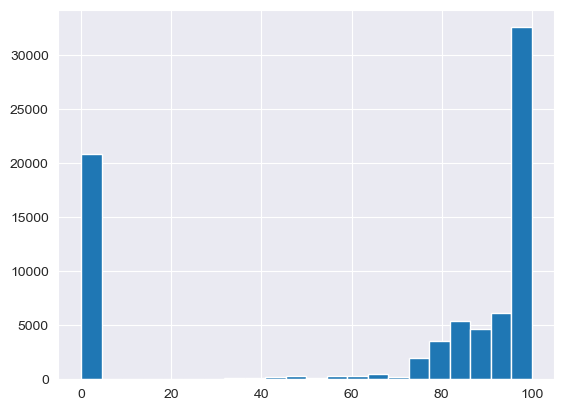

In [19]:
# Visualize column 'noise_event_laeq_primary_detected_certainty'
plt.hist(noise_event['noise_event_laeq_primary_detected_certainty'], bins='auto')
plt.show()

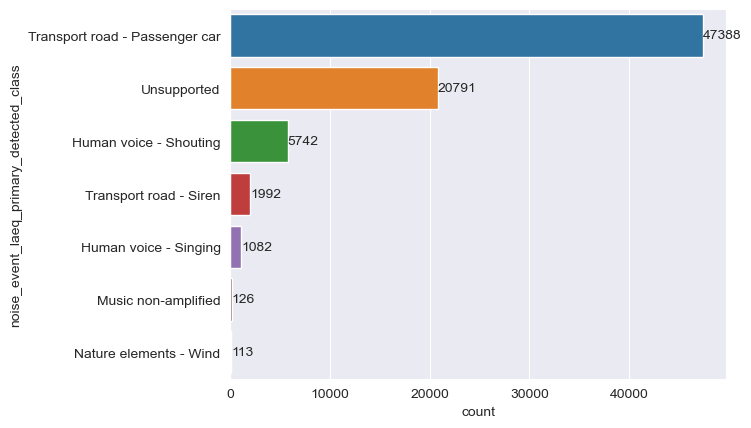

In [20]:
# Visualize column 'noise_event_laeq_primary_detected_class'
sns.countplot(y='noise_event_laeq_primary_detected_class', data=noise_event,
              order = noise_event['noise_event_laeq_primary_detected_class'].value_counts().index)

# Add count values to the plot
counts = noise_event['noise_event_laeq_primary_detected_class'].value_counts()
for i, count in enumerate(counts):
    plt.annotate(count, (count + 1, i), ha='left', va='center')

plt.show()

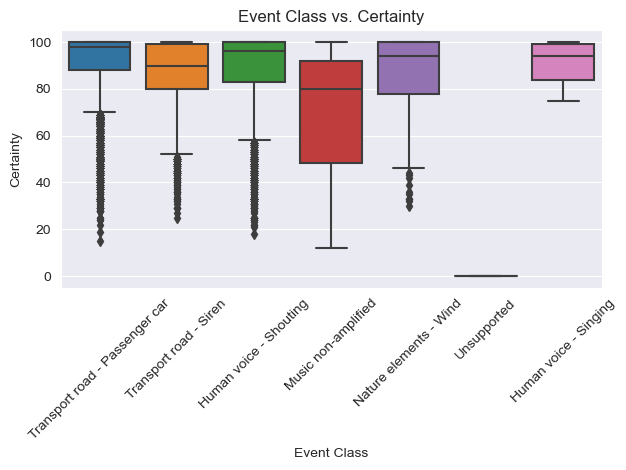

In [21]:
# Explore spread of detected certainty of detected event classes
sns.boxplot(x='noise_event_laeq_primary_detected_class',
            y='noise_event_laeq_primary_detected_certainty', data=noise_event)
plt.xlabel('Event Class')
plt.ylabel('Certainty')
plt.title('Event Class vs. Certainty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

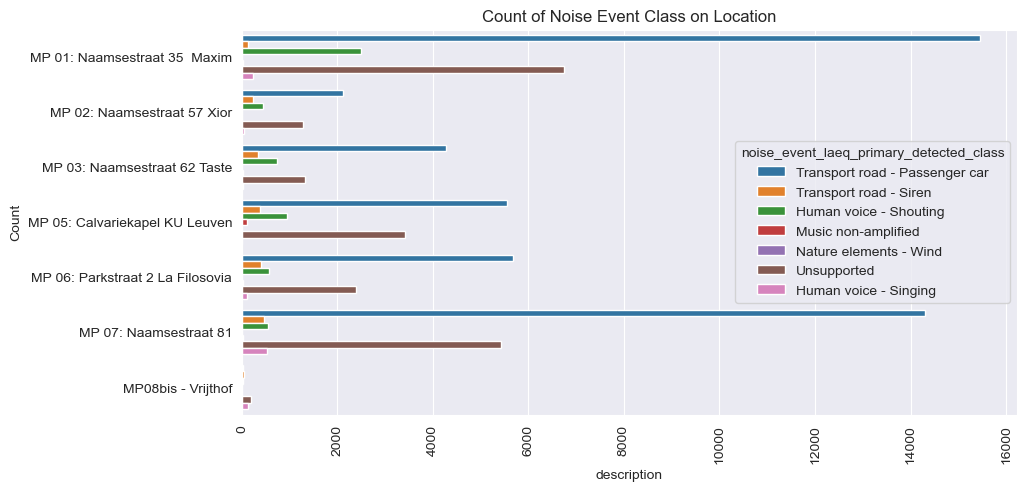

In [22]:
# Create a countplot for count of noise event class on location
plt.figure(figsize=(10, 5))
sns.countplot(y='description', data=noise_event, hue='noise_event_laeq_primary_detected_class')

# Set labels and title
plt.xlabel('description')
plt.ylabel('Count')
plt.title('Count of Noise Event Class on Location')

plt.xticks(rotation = 90)
# Show the plot
plt.show()

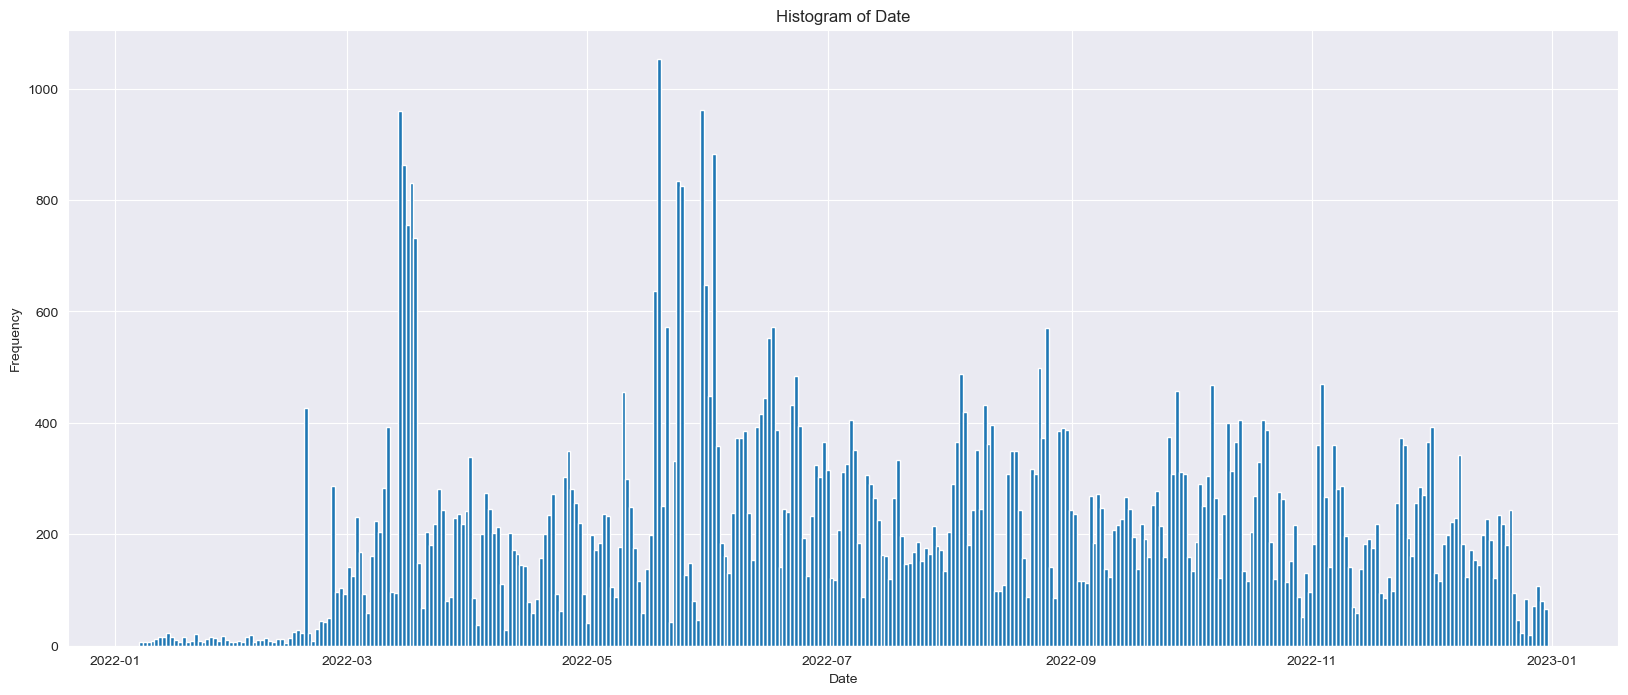

In [23]:
# Create a histogram plot for 'date'
plt.figure(figsize=(20, 8))
plt.hist(noise_event['date'], bins=359) # bins: If an integer, divide the counts in the specified number of bins, and color the hexagons accordingly.
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Date')
plt.show()

In [24]:
noise_event['date'].value_counts()

2022-05-19    1053
2022-05-30     961
2022-03-14     960
2022-06-02     883
2022-03-15     862
              ... 
2022-01-07       6
2022-01-23       6
2022-01-30       6
2022-02-05       6
2022-02-13       4
Name: date, Length: 359, dtype: int64

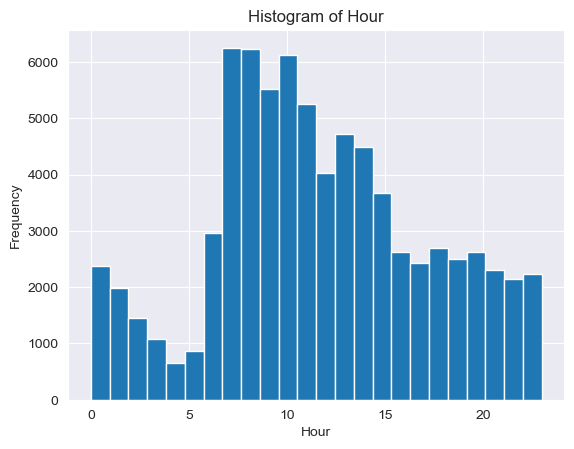

In [25]:
# Create a histogram plot for 'hour'
plt.hist(noise_event['hour'], bins = 24)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Histogram of Hour')
plt.show()

In [30]:
noise_event['hour'].value_counts()

7     6255
8     6236
10    6117
9     5516
11    5256
13    4730
14    4499
12    4031
15    3671
6     2964
18    2689
20    2629
16    2618
19    2505
17    2427
0     2379
21    2304
23    2238
22    2142
1     1978
2     1460
3     1079
5      857
4      654
Name: hour, dtype: int64

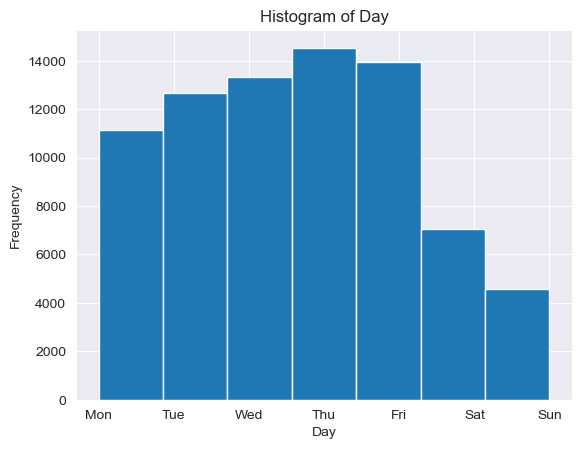

In [30]:
# Create a histogram plot for 'day'
plt.hist(noise_event['day'], bins=7)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Histogram of Day')
plt.show()

In [31]:
noise_event['day'].value_counts()

Thu    14542
Fri    13962
Wed    13313
Tue    12653
Mon    11131
Sat     7054
Sun     4579
Name: day, dtype: int64

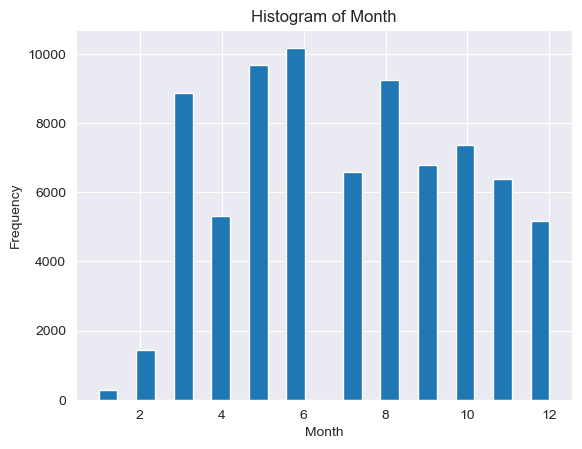

In [32]:
# Create a histogram plot for 'hour'
plt.hist(noise_event['month'], bins = 24)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Month')
plt.show()

In [33]:
noise_event['month'].value_counts()

6     10174
5      9683
8      9242
3      8852
10     7350
9      6789
7      6596
11     6377
4      5305
12     5158
2      1424
1       284
Name: month, dtype: int64

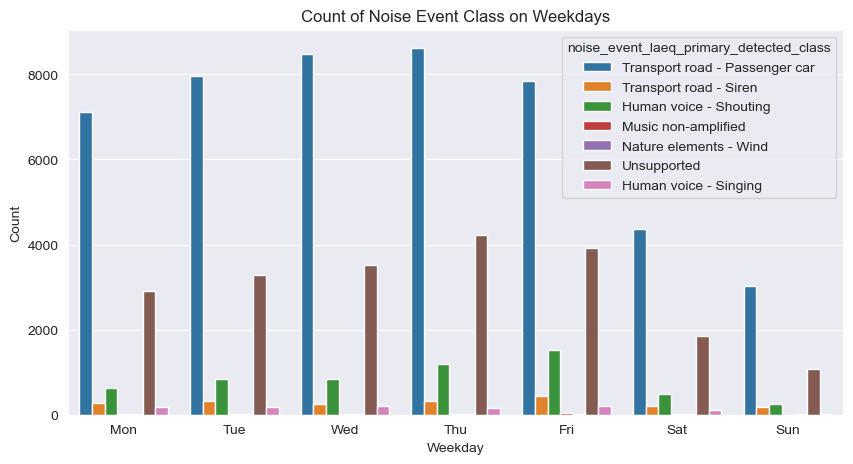

In [34]:
# Create a countplot for count of noise event class on 'day''
plt.figure(figsize=(10, 5))
sns.countplot(x='day', data=noise_event, hue='noise_event_laeq_primary_detected_class')

# Set labels and title
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Count of Noise Event Class on Weekdays')

# Show the plot
plt.show()

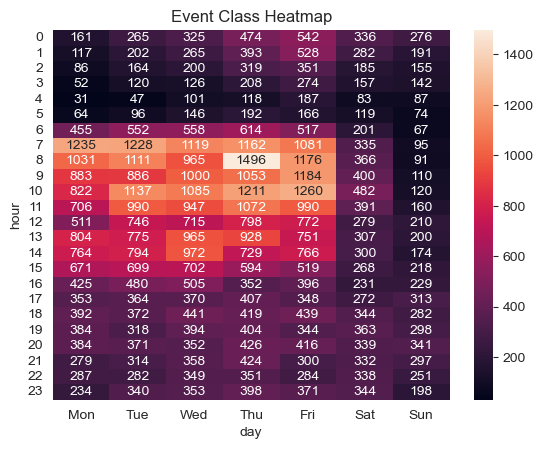

In [35]:
# Create the heatmap plot for event class
# Create a pivot table to aggregate the event_class counts by time and weekday
pivot_table = noise_event.pivot_table(index='hour', columns='day',
                                      values='noise_event_laeq_primary_detected_class', aggfunc='count')

# Sort weekdays in order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pivot_table = pivot_table.reindex(columns=weekday_order)

# Create the heatmap
sns.heatmap(pivot_table, annot=True, fmt='g')
plt.title('Event Class Heatmap')

plt.show()

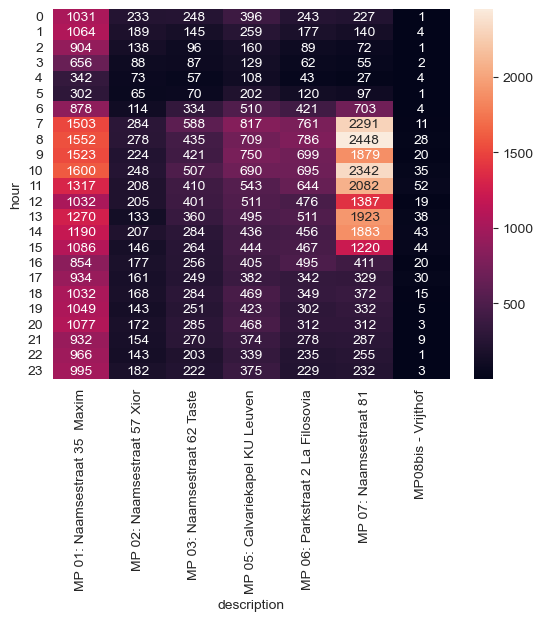

In [36]:
# Create a hourly heatmap of noise event
pivot_table = noise_event.pivot_table(index='hour', columns='description',
                                      values='noise_event_laeq_primary_detected_class', aggfunc='count')
# Create the heatmap
sns.heatmap(pivot_table, annot=True, fmt='g')
plt.show()

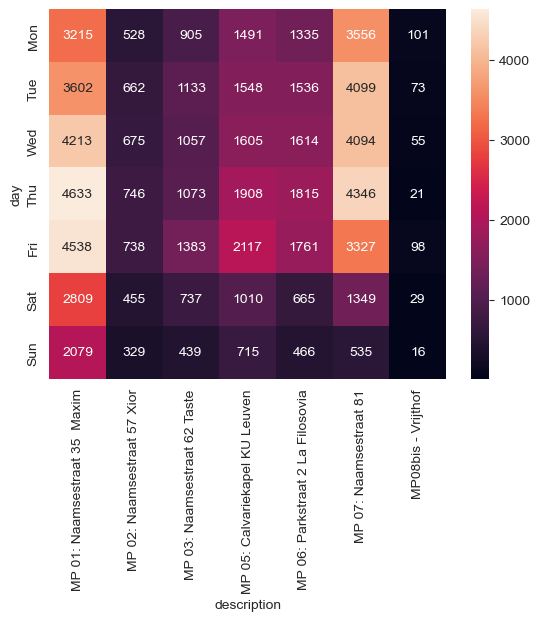

In [37]:
# Create a daily heatmap of noise event
pivot_table = noise_event.pivot_table(index='day', columns='description',
                                      values='noise_event_laeq_primary_detected_class', aggfunc='count')
# Sort days in order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pivot_table = pivot_table.reindex(index=day_order)

# Create the heatmap
sns.heatmap(pivot_table, annot=True, fmt='g')
plt.show()

### Transform Data for Future Modelling

In [38]:
# Rename column
noise_event = noise_event.rename(columns={'noise_event_laeq_primary_detected_class': 'class'})
# Replace values in class
noise_event['class'] = noise_event['class'].replace('Transport road - Passenger car', 'transport')
noise_event['class'] = noise_event['class'].replace('Unsupported', 'unsupported')
noise_event['class'] = noise_event['class'].replace('Human voice - Shouting', 'human')
noise_event['class'] = noise_event['class'].replace('Transport road - Siren', 'transport')
noise_event['class'] = noise_event['class'].replace('Human voice - Singing', 'human')
noise_event['class'] = noise_event['class'].replace('Music non-amplified', 'music')
noise_event['class'] = noise_event['class'].replace('Nature elements - Wind', 'wind')

In [39]:
# Apply One-hot encoding on column 'class'
one_hot_encoded_data = pd.get_dummies(noise_event, columns=['class'])

# Group by 'hourly_timestamp' and 'description' and aggregate the 'c1', 'c2', and 'c3' columns by sum
noise_event_model = one_hot_encoded_data.groupby(['hourly_timestamp', 'description']).agg({'class_human': 'sum', 'class_music':'sum','class_transport':'sum','class_unsupported':'sum','class_wind':'sum'})
# Reset the index to convert the grouped columns to regular columns
noise_event_model = noise_event_model.reset_index()

# Create new column event_count as the sum of all events
noise_event_model['event_count'] = noise_event_model[['class_human', 'class_music', 'class_transport','class_unsupported','class_wind']].sum(axis=1)

In [96]:
noise_event_model.info()
# save data
# noise_event_model.to_csv('../data/processed/model_noise_event.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23780 entries, 0 to 23779
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hourly_timestamp   23780 non-null  datetime64[ns]
 1   description        23780 non-null  object        
 2   class_human        23780 non-null  uint8         
 3   class_music        23780 non-null  uint8         
 4   class_transport    23780 non-null  uint8         
 5   class_unsupported  23780 non-null  uint8         
 6   class_wind         23780 non-null  uint8         
 7   event_count        23780 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1), uint8(5)
memory usage: 673.6+ KB
